Epoch: 0001 cost= 0.350389302
Epoch: 0051 cost= 0.002949767
Epoch: 0101 cost= 0.002017481
Epoch: 0151 cost= 0.001530989
Epoch: 0201 cost= 0.001249221
Epoch: 0251 cost= 0.001068465
Epoch: 0301 cost= 0.000958548
Epoch: 0351 cost= 0.000882209
Epoch: 0401 cost= 0.000789699
Epoch: 0451 cost= 0.000688531
Epoch: 0501 cost= 0.000611633
Epoch: 0551 cost= 0.000556308
Epoch: 0601 cost= 0.000507541
Epoch: 0651 cost= 0.000469823
Epoch: 0701 cost= 0.000440369
Epoch: 0751 cost= 0.000416483
Epoch: 0801 cost= 0.000393151
Epoch: 0851 cost= 0.000373359
Epoch: 0901 cost= 0.000358094
Epoch: 0951 cost= 0.000344114
Optimization Finished!
Training cost= 0.0003299658 



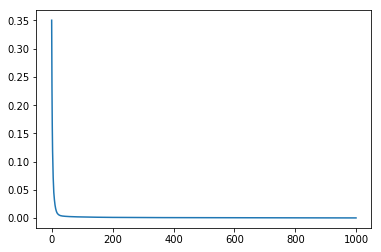

In [6]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

datacount = 200 

#trainx = list(range(1,51))
#trainy = [v**2 for v in trainx]

trainx = np.random.rand(datacount)
trainy = [v**2 for v in trainx]
    
# Divide data by half for testing and training
train_X = np.asarray(trainx[0:int(datacount/2)]) 
train_Y = np.asarray(trainy[0:int(datacount/2)])
test_X  = np.asarray(trainx[int(datacount/2):])
test_Y  = np.asarray(trainy[int(datacount/2):])


rng = np.random

learning_rate = 0.01
training_epochs = 1000
display_step = 50

n_samples = train_X.shape[0]


X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(rng.randn(1,16), name="weight1",dtype="float")
b1 = tf.Variable(rng.randn(16), name="bias1",dtype="float")

fc1 = tf.nn.relu(tf.matmul(X, W1) + b1)       #out1 = tf.add(tf.multiply(X, W1), b1)


W2 = tf.Variable(rng.randn(16,32), name="weight2",dtype="float")
b2 = tf.Variable(rng.randn(32), name="bias2",dtype="float")

fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)

W3 = tf.Variable(rng.randn(32,1), name="weight3",dtype="float")
b3 = tf.Variable(rng.randn(1), name="bias3",dtype="float")

pred = tf.matmul(fc2, W3) + b3                  #pred = tf.nn.relu(tf.matmul(X, W1) + b1)


cost      = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()
loss_history = []

sess = tf.Session()
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x.reshape([1,1]), Y: y.reshape([1,1])})

    c = sess.run(cost, feed_dict={X: train_X.reshape([int(datacount/2),1]), Y:train_Y.reshape([int(datacount/2),1])})     
    loss_history.append(c)
  

    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X.reshape([int(datacount/2),1]), Y: train_Y.reshape([int(datacount/2),1])})
print("Training cost=", training_cost, '\n')


plt.plot(loss_history)
plt.show()


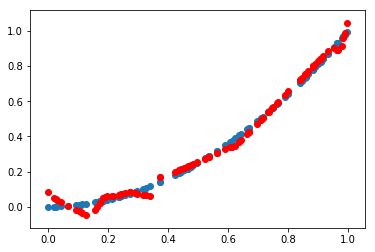

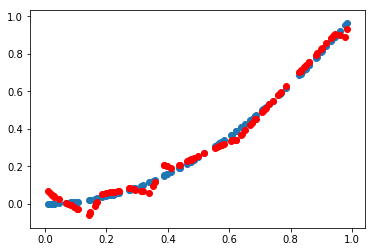

In [7]:
y_res = sess.run(pred, feed_dict={X: train_X.reshape([int(datacount/2),1])})

plt.scatter(train_X,train_Y)
plt.scatter(train_X,y_res, color='r')

plt.show()


y_res_test = sess.run(pred, feed_dict={X: test_X.reshape([int(datacount/2),1])})

plt.scatter(test_X,test_Y)
plt.scatter(test_X,y_res_test, color='r')

plt.show()